In [411]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

In [412]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv') 

titanic = pd.concat([titanic_train, titanic_test], axis=0)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Reseting index to ensure unique index labels

In [413]:
titanic.reset_index(drop=True, inplace=True)

Exploratory Data Analysis

In [414]:
titanic.shape

(1309, 12)

In [415]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


Summary Statistics

In [416]:
titanic.describe().round()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.0,891.0,1309.0,1046.0,1309.0,1309.0,1308.0
mean,655.0,0.0,2.0,30.0,0.0,0.0,33.0
std,378.0,0.0,1.0,14.0,1.0,1.0,52.0
min,1.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,328.0,0.0,2.0,21.0,0.0,0.0,8.0
50%,655.0,0.0,3.0,28.0,0.0,0.0,14.0
75%,982.0,1.0,3.0,39.0,1.0,0.0,31.0
max,1309.0,1.0,3.0,80.0,8.0,9.0,512.0


Distribution of target variable 'Survived'

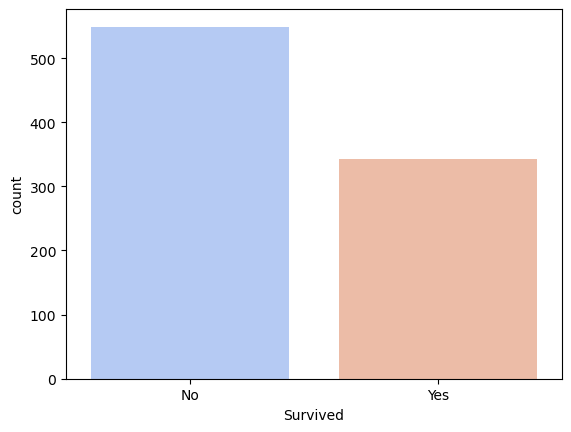

In [417]:
sns.countplot(data=titanic, x='Survived', palette='coolwarm')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

Distribution of variable 'Age'

<Axes: xlabel='Age', ylabel='Count'>

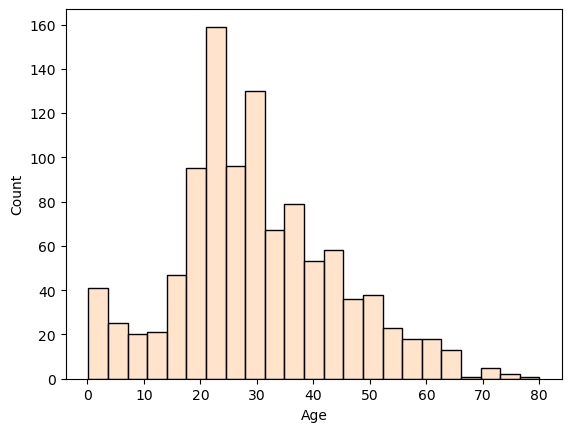

In [418]:
sns.histplot(data=titanic, x='Age', color='peachpuff')

Survival count by gender

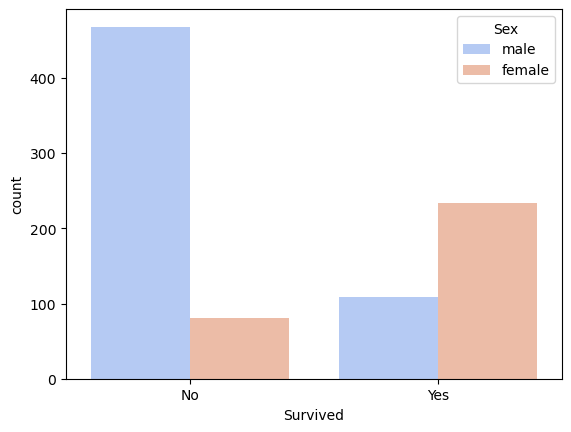

In [419]:
sns.countplot(data=titanic, x='Survived', hue='Sex', palette='coolwarm')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

Survival count by passenger class

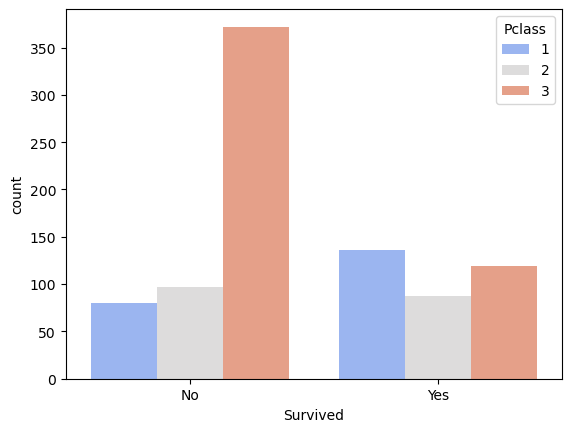

In [420]:
sns.countplot(data=titanic, x='Survived', hue='Pclass', palette='coolwarm')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

Data Preprocessing & Feature Engineering

Creating a 'Cabin Category' variable 

In [421]:
all_cabins = titanic['Cabin'].unique()
cabin_categories = set()

for cabin in all_cabins:
    if pd.notna(cabin):  
        cabin_categories.add((cabin[0]))

titanic['CabinCategory'] = titanic['Cabin'].apply(lambda cabin: cabin[0] if pd.notna(cabin) else np.nan)
print(f"Cabin Categories: {titanic['CabinCategory'].unique()}")

Cabin Categories: [nan 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


Visualizing Cabin Categories

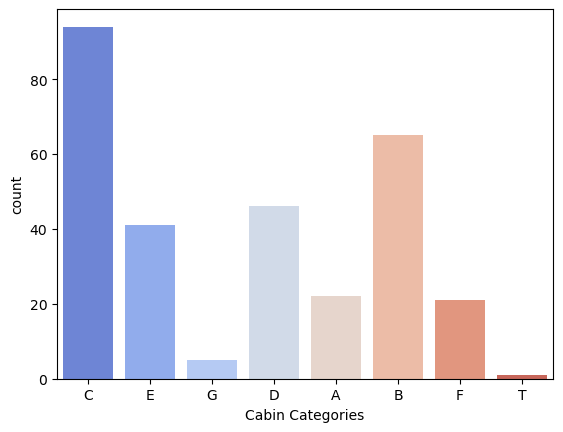

In [422]:
sns.countplot(data=titanic, x='CabinCategory', palette='coolwarm')
plt.xlabel('Cabin Categories')
plt.show()

Handling missing values

In [423]:
titanic.isna().sum()

PassengerId         0
Survived          418
Pclass              0
Name                0
Sex                 0
Age               263
SibSp               0
Parch               0
Ticket              0
Fare                1
Cabin            1014
Embarked            2
CabinCategory    1014
dtype: int64

Imputing null values with mode for 'CabinCategory' variable and mean for 'Age' variable

In [424]:
new_cabin_category = titanic['CabinCategory'].mode()[0]
print("Cabin Category Mode:", new_cabin_category)
titanic['CabinCategory'].fillna(new_cabin_category, inplace=True)

new_age = titanic['Age'].mean().round()
print("Age Mean:", new_age)
titanic['Age'].fillna(new_age, inplace=True)

Cabin Category Mode: C
Age Mean: 30.0


Dropping 'Cabin' variable due to large amount of null values

In [425]:
titanic.drop(columns=['Cabin'], inplace=True)

Removing remaining null values

In [426]:
titanic.dropna(inplace=True)

Confirming there are no more missing values

In [427]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
CabinCategory    0
dtype: int64

Outlier Detection 

Visualizing features after outlier removal

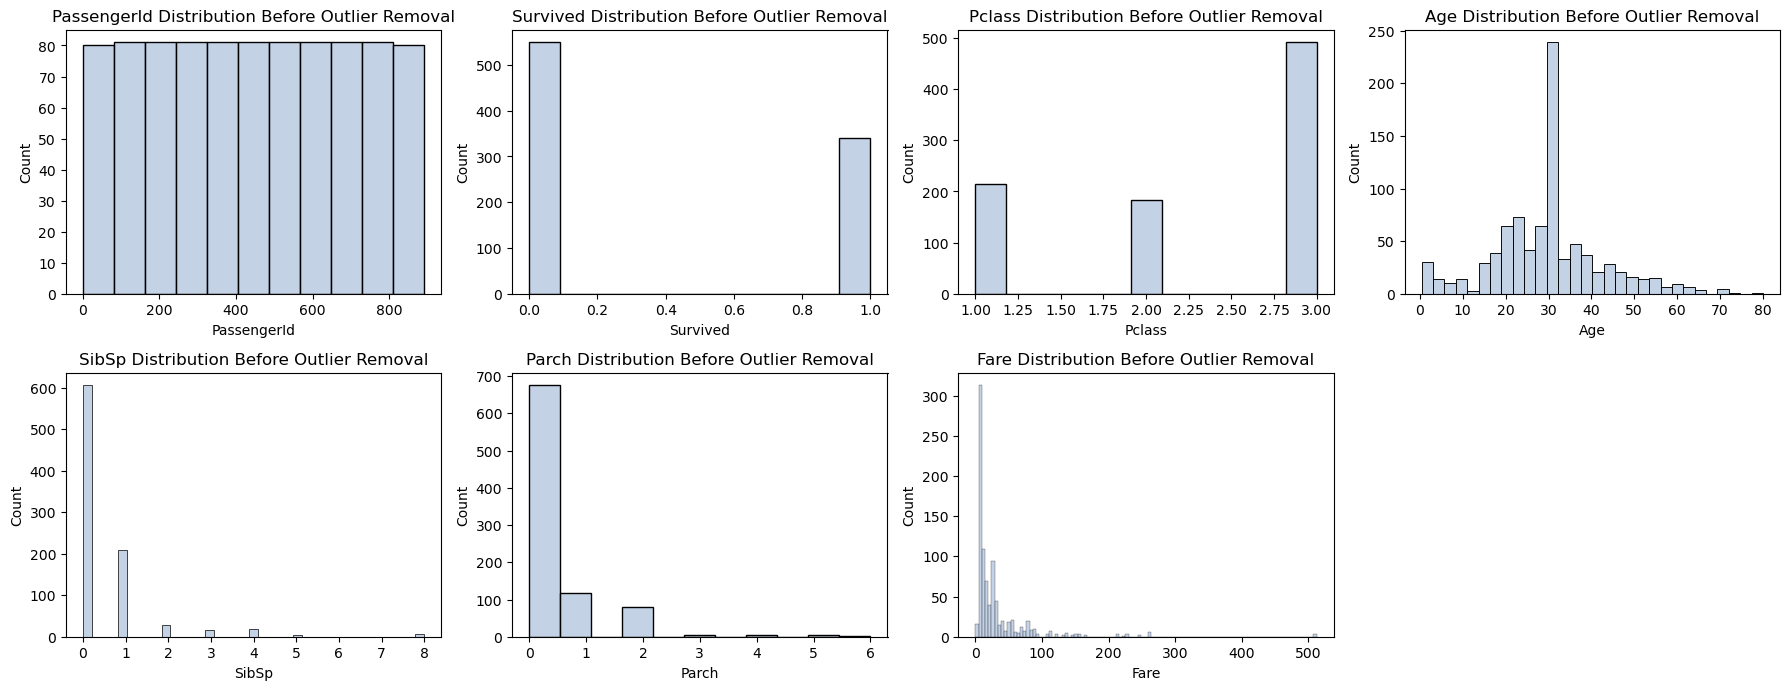

In [428]:
numerical = ['PassengerId',	'Survived',	'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

plt.figure(figsize=(18, 10))
for i, feature in enumerate(numerical):
    plt.subplot(3, 4, i+1)
    sns.histplot(titanic[feature], color='lightsteelblue')
    plt.title(f'{feature} Distribution Before Outlier Removal')

plt.tight_layout()
plt.show()

Outlier removal using Z-Score method

In [429]:
# numerical = ['PassengerId',	'Survived',	'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# threshold = 3
# for col in numerical:
#     titanic[col + '_Zscore'] = zscore(titanic[col])
#     titanic = titanic[titanic[col + '_Zscore'].abs() <= threshold]

# titanic.drop(columns=[col + '_Zscore' for col in numerical], inplace=True)

Visualizing features after outlier removal

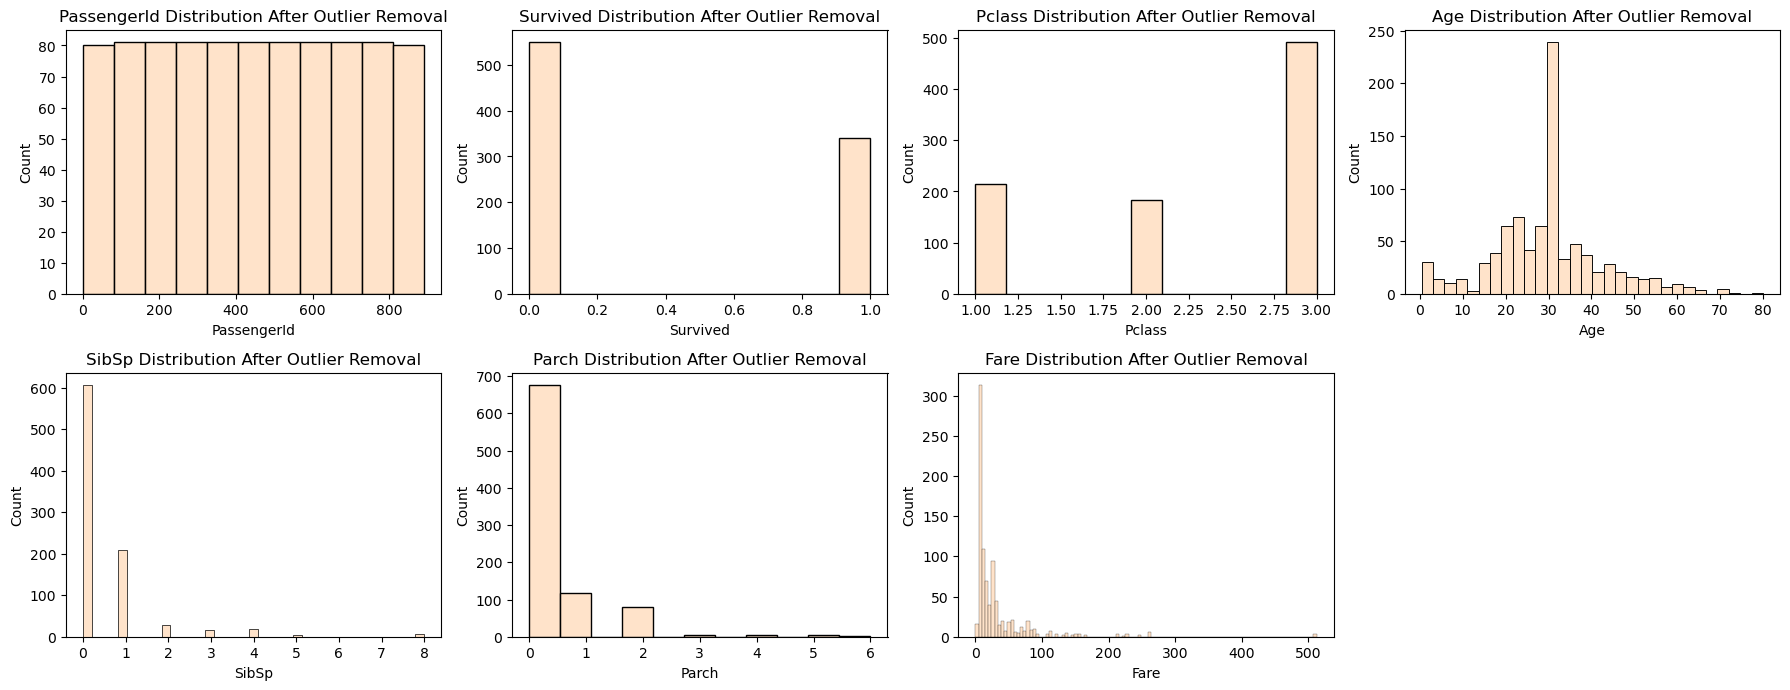

In [430]:
plt.figure(figsize=(18, 10))
for i, feature in enumerate(numerical):
    plt.subplot(3, 4, i+1)
    sns.histplot(titanic[feature], color='peachpuff')
    plt.title(f'{feature} Distribution After Outlier Removal')

plt.tight_layout()
plt.show()

In [431]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinCategory
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,C
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,C
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,C


One hot encoding

In [432]:
print(f"'Embarked' values:{titanic['Embarked'].unique()}")
print(f"'Cabin Category' values:{titanic['CabinCategory'].unique()}")
print(f"'Sex' values:{titanic['Sex'].unique()}")

'Embarked' values:['S' 'C' 'Q']
'Cabin Category' values:['C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
'Sex' values:['male' 'female']


Performing one hot encoding for columns 'Embarked', 'CabinCategory' and 'Sex'

In [433]:
titanic = pd.get_dummies(titanic, columns=['Embarked', 'CabinCategory', 'Sex'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_C,...,CabinCategory_A,CabinCategory_B,CabinCategory_C,CabinCategory_D,CabinCategory_E,CabinCategory_F,CabinCategory_G,CabinCategory_T,Sex_female,Sex_male
0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,...,False,False,True,False,False,False,False,False,False,True
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,...,False,False,True,False,False,False,False,False,True,False
2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,...,False,False,True,False,False,False,False,False,True,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,...,False,False,True,False,False,False,False,False,True,False
4,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,...,False,False,True,False,False,False,False,False,False,True


Model Building

In [434]:
X = titanic.drop(['Survived', 'Name', 'Ticket'], axis=1)
y = titanic['Survived']

In [435]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [436]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [437]:
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

In [454]:
from sklearn.model_selection import GridSearchCV

param_grid_logistic_regression = {
    'C': [0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

param_grid_decision_tree = {
    'max_depth': [2, 3],
    'min_samples_split': [2, 5]
}

param_grid_random_forest = {
    'n_estimators':  [30, 60],
    'max_depth': [15, 30],
    'min_samples_split': [10, 30]
}

models = {
    'Logistic Regression': (LogisticRegression(), param_grid_logistic_regression),
    'Decision Tree': (DecisionTreeClassifier(), param_grid_decision_tree),
    'Random Forest': (RandomForestClassifier(), param_grid_random_forest),
}

for name, (model, param_grid) in models.items():
    print(name)

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', error_score='raise')
    grid_search.fit(X_train_scaled, y_train)
    
    print("Best Parameters:", grid_search.best_params_)
    
    best_model = grid_search.best_estimator_
    
    best_model.fit(X_train_scaled, y_train)
    
    y_train_pred = best_model.predict_proba(X_train_scaled)[:, 1]
    auc_train = round(roc_auc_score(y_train, y_train_pred) * 100)
    print(f"Training AUC Score: {auc_train}%")
    
    y_val_pred = best_model.predict_proba(X_val_scaled)[:, 1]
    auc_val = round(roc_auc_score(y_val, y_val_pred) * 100)
    print(f"Validation AUC Score: {auc_val}%")
    
    y_test_pred = best_model.predict_proba(X_test_scaled)[:, 1]
    auc_test = round(roc_auc_score(y_test, y_test_pred) * 100)
    print(f"Testing AUC Score: {auc_test}%")
    
    print("\n")


Logistic Regression
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Training AUC Score: 86%
Validation AUC Score: 84%
Testing AUC Score: 86%


Decision Tree
Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Training AUC Score: 87%
Validation AUC Score: 85%
Testing AUC Score: 88%


Random Forest
Best Parameters: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 60}
Training AUC Score: 98%
Validation AUC Score: 83%
Testing AUC Score: 89%


